In [5]:
import pandas as pd
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('features.csv')

In [ ]:
path = 'dataset/input/100'
record = wfdb.rd_record()

In [4]:
df.target.value_counts()

target
N    90125
V     7009
Q     3006
S     2781
F      803
Name: count, dtype: int64

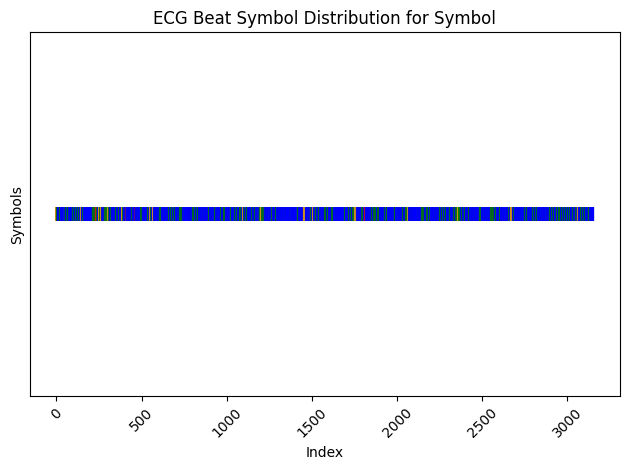

In [ ]:
# Define colors for each symbol
symbol_colors = {'N': 'blue', 'S': 'red', 'V': 'green', 'F': 'purple', 'Q': 'orange'}

# Filter target values based on symbol
sym = df['target'].loc[df['signal_name'] == 233]  
indices = np.arange(len(sym))  # Create indices for the symbol occurrences
# Get the color list corresponding to the symbol labels
colors = [symbol_colors[sy] for sy in sym]  
# Create a new subplot for each symbol


# Scatter plot to show symbol variations along indices
plt.scatter(indices, np.ones_like(indices), c=colors, marker='|', s=106)
# Adding labels and title for each subplot
plt.xlabel("Index")
plt.ylabel("Symbols")
plt.title(f"ECG Beat Symbol Distribution for Symbol")
plt.xticks(rotation=45)
plt.yticks([])  # Removing y-ticks for clarity

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


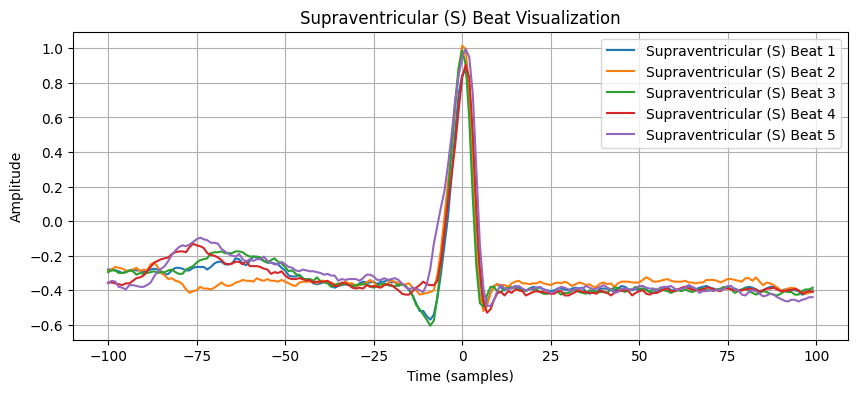

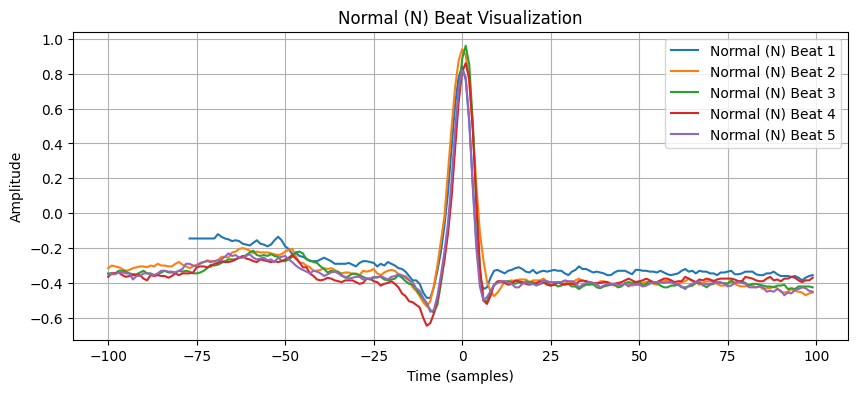

In [13]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# Load MIT-BIH Record (Replace with your file path)
record_name = "dataset/input/100"  # Change based on your dataset location
record = wfdb.rdrecord(record_name)
ann = wfdb.rdann(record_name, "atr")

# Extract ECG signal and annotation labels
ecg_signal = record.p_signal[:, 0]  # Assuming lead 1
fs = record.fs  # Sampling frequency
labels = ann.symbol
r_peaks = ann.sample  # R-peak locations

# AAMI Beat Mapping (for grouping labels)
aami_mapping = {
    'N': 'N', 'L': 'N', 'R': 'N', 'e': 'N', 'j': 'N',  # Normal
    'A': 'S', 'a': 'S', 'J': 'S', 'S': 'S',  # Supraventricular
    'V': 'V', 'E': 'V',  # Ventricular
    'F': 'F',  # Fusion
    '/': 'Q', 'f': 'Q', 'Q': 'Q'  # Unknown
}

# Find indices of S and N beats
s_beats = [r for r, lbl in zip(r_peaks, labels) if aami_mapping.get(lbl, 'Q') == 'S']
n_beats = [r for r, lbl in zip(r_peaks, labels) if aami_mapping.get(lbl, 'Q') == 'N']

# Function to extract and plot beats
def plot_beats(signal, peaks, label, num_beats=5, window=100):
    plt.figure(figsize=(10, 4))
    for i, peak in enumerate(peaks[:num_beats]):
        start, end = max(0, peak - window), min(len(signal), peak + window)
        plt.plot(np.arange(start, end) - peak, signal[start:end], label=f"{label} Beat {i+1}")
    plt.title(f"{label} Beat Visualization")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.show()

# Plot S and N beats
plot_beats(ecg_signal, s_beats, "Supraventricular (S)")
plot_beats(ecg_signal, n_beats, "Normal (N)")


In [25]:
dir = pd.read_csv('directory.csv')
path = "dataset//input"



In [32]:
symbols = []
for i in dir.name.values: 
    record_name = f'dataset\\input\\{i[:-4]}'
    ann = wfdb.rdann(record_name, "atr")
    symbols.append(len(ann.sample))

In [33]:
sum(symbols)

103724

In [34]:
import tensorflow as tf

In [41]:
a = [[1] * 3] 

a = tf.keras.utils.pad_sequences(a, maxlen=5, padding='post', value = 0)
a

array([[1, 1, 1, 0, 0]], dtype=int32)